**1. DOWNLOAD THE DATASET**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


**2. LOAD THE DATASET**

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
import matplotlib.pyplot as plt
df =pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

**3. PERFORM VISUALIZATIONS**

Univariate Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


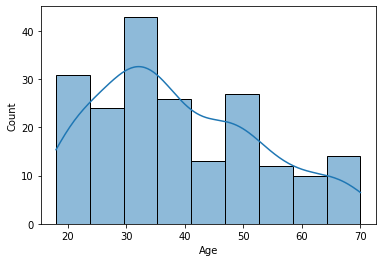

In [12]:
sns.histplot(df.Age,kde=True)

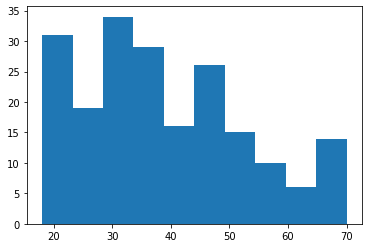

In [13]:
plt.hist(df['Age'])
plt.show()

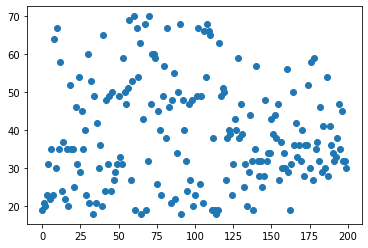

In [14]:
plt.scatter(df.index, df['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


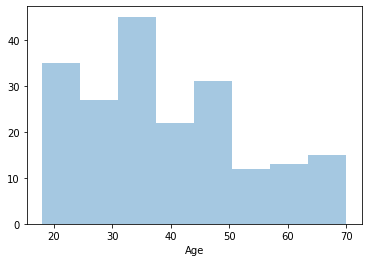

In [15]:
sns.distplot(df['Age'],kde=False)

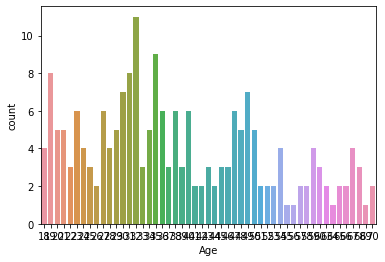

In [16]:
sns.countplot(x='Age',data=df)

Bivariate Analysis

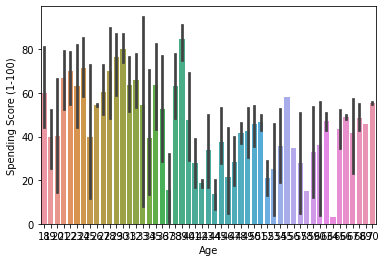

In [17]:
sns.barplot(x='Age',y='Spending Score (1-100)',data=df)

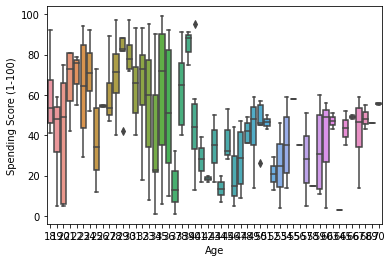

In [18]:
sns.boxplot(data=df, x='Age',y='Spending Score (1-100)')

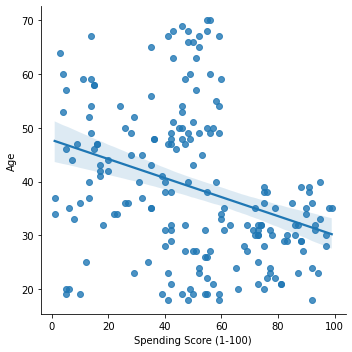

In [19]:
sns.lmplot(y='Age',x='Spending Score (1-100)',data=df)

In [20]:
#Chi-square test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(df['Spending Score (1-100)'])
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


Estimated coefficients:
b_0 = 73.70119104335399 \nb_1 = -0.6049212623771938


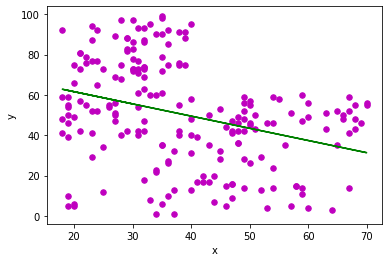

In [21]:
def estimate_coef(x, y):
  n = np.size(x)
  m_x = np.mean(x)
  m_y = np.mean(y)
  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x
  # calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x
  return (b_0, b_1)
def plot_regression_line(x, y, b):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m",marker = "o", s = 30)
  # predicted response vector
  y_pred = b[0] + b[1]*x
  # plotting the regression line
  plt.plot(x, y_pred, color = "g")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
def main():
  x = df['Age']
  y = df['Spending Score (1-100)']
  b = estimate_coef(x, y)
  print("Estimated coefficients:\nb_0 = {} \\nb_1 = {}".format(b[0], b[1]))
  plot_regression_line(x, y, b)
if __name__ == "__main__":
  main()

Multivariate Analysis

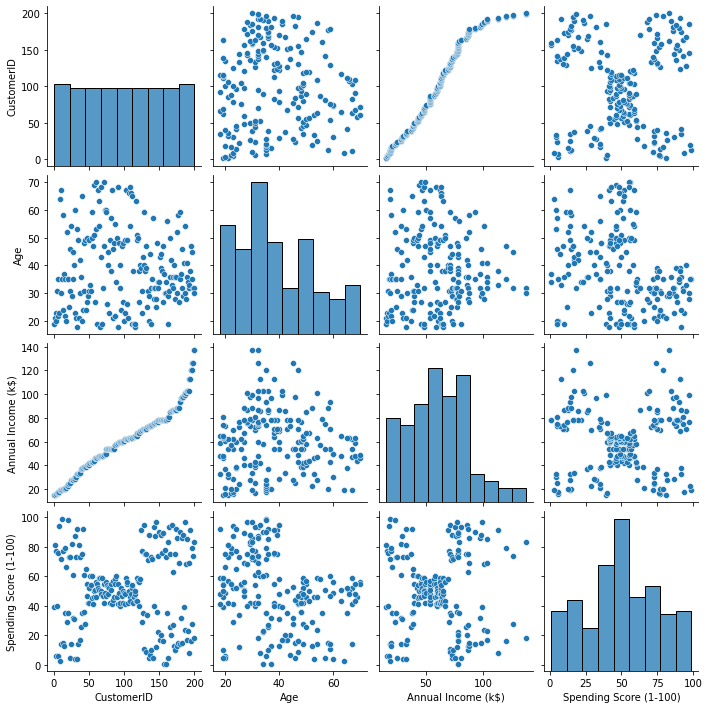

In [22]:
sns.pairplot(df)

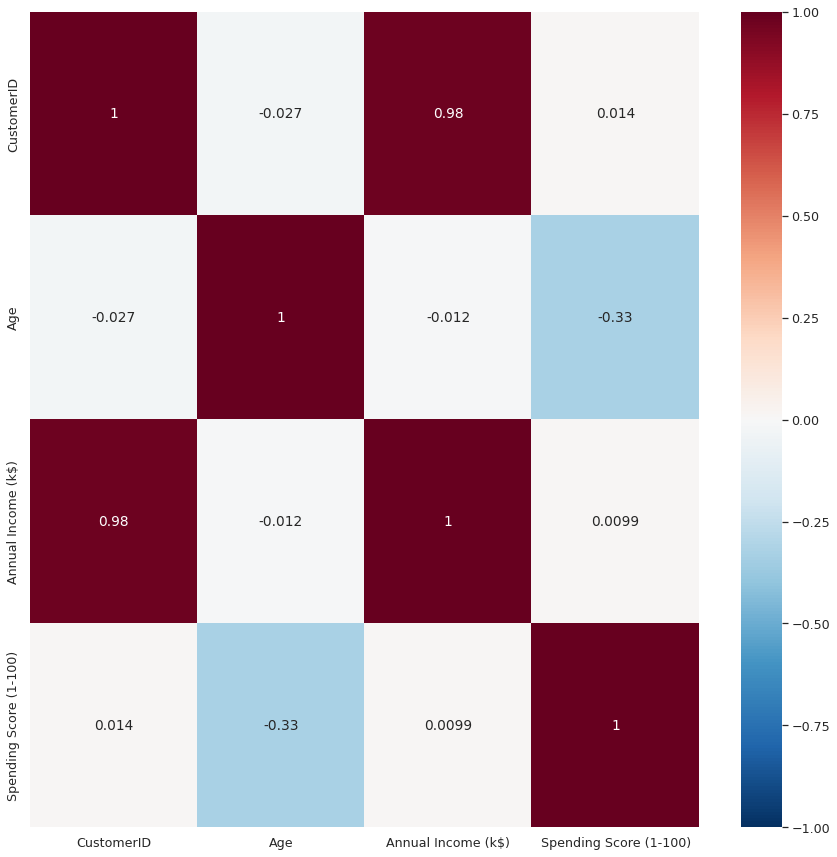

In [23]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1);

**4. DESCRIPTIVE STATISTICS**

In [24]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [26]:
df['Age'].sum()

7770

In [27]:
df['Age'].cumsum()

0        19
1        40
2        60
3        83
4       114
       ... 
195    7631
196    7676
197    7708
198    7740
199    7770
Name: Age, Length: 200, dtype: int64

In [28]:
df['Age'].min()

18

In [29]:
df['Age'].max()

70

In [30]:
df['Age'].abs()

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [31]:
df['Age'].prod()

0

In [32]:
df['Age'].cumprod()

0           19
1          399
2         7980
3       183540
4      5689740
        ...   
195          0
196          0
197          0
198          0
199          0
Name: Age, Length: 200, dtype: int64

In [33]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [34]:
df.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

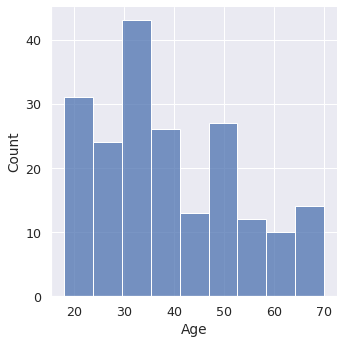

In [35]:
print(sns.displot(df['Age']))

**5. Check for Missing values and deal with them**

In [36]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [37]:
from ast import increment_lineno
%matplotlib inline
sns.set(color_codes=True)
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [54]:
df['Annual Income (k$)'].mean()

60.56

In [55]:
df['Spending Score (1-100)'].min()

1

In [56]:
df['Age'].mode()[0]

32

In [59]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [60]:
df['Annual Income (k$)'].mode()[0]

54

**6. Find the outliers and replace the outliers**

In [38]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


In [39]:
quantile = df.quantile(q = [0.75,0.25])
quantile

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [40]:
Upper_extreme = quantile.iloc[0] + (1.5*IQR)
Upper_extreme

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [41]:
lower_extreme = quantile.iloc[1] - (1.5*IQR)
lower_extreme

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [61]:
df.skew()

CustomerID                0.000000
Gender                   -0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


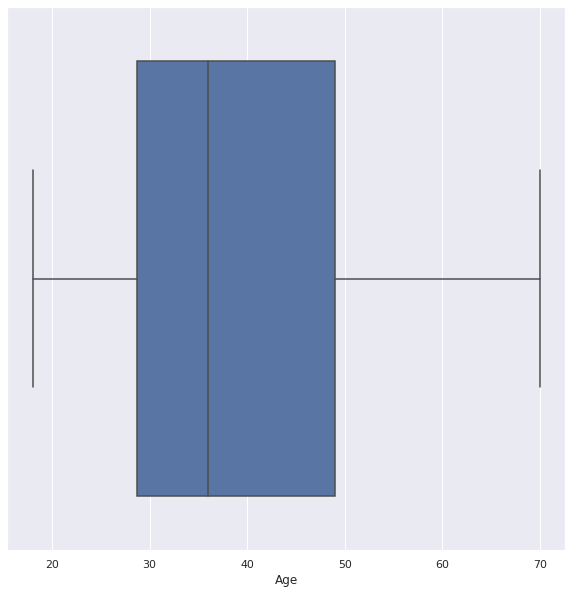

In [62]:
sns.boxplot(df["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


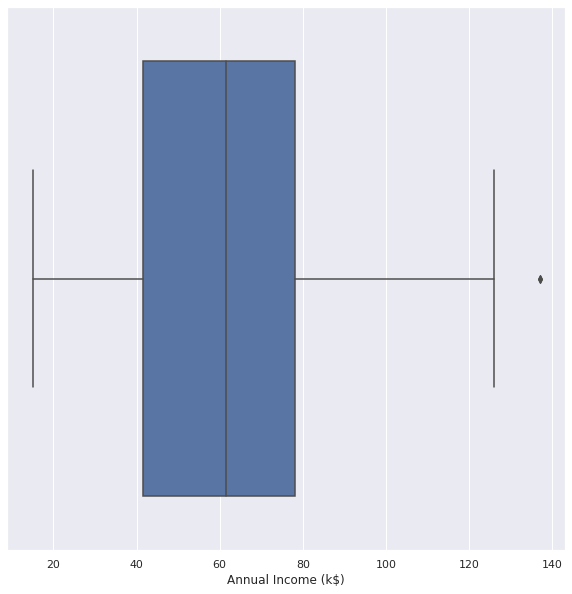

In [63]:
sns.boxplot(df["Annual Income (k$)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


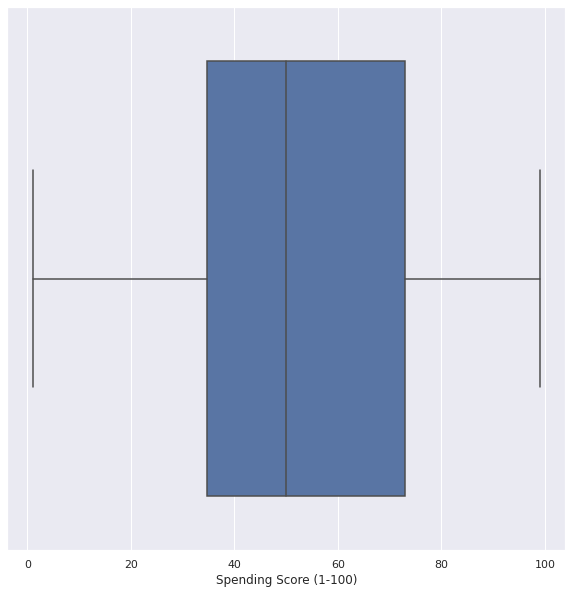

In [64]:
sns.boxplot(df["Spending Score (1-100)"])

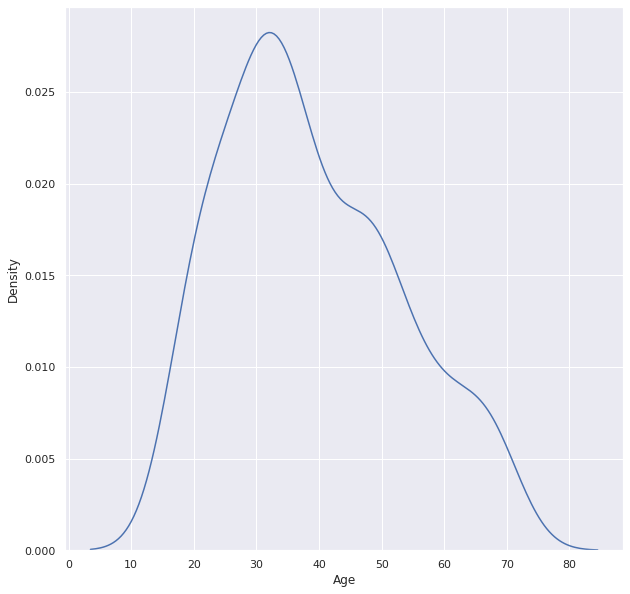

In [65]:
sns.kdeplot(df["Age"])

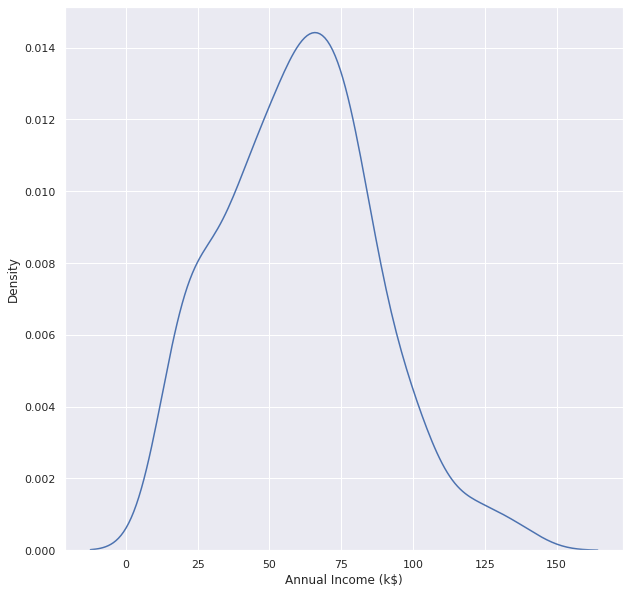

In [66]:
sns.kdeplot(df["Annual Income (k$)"])

In [69]:
q1 = df["Annual Income (k$)"].describe()["25%"]
q1

41.5

In [70]:
q3 = df["Spending Score (1-100)"].describe()["75%"]
q3

73.0

In [71]:
iqr = q3-q1
iqr

31.5

In [72]:
l_b = q1-(1.5*iqr)
u_b = q3+(1.5*iqr)

In [73]:
l_b

-5.75

In [74]:
u_b

120.25

In [75]:
outlier_list = list(df[df["Spending Score (1-100)"]>l_b]["Spending Score (1-100)"])

In [76]:
outlier_list

[39,
 81,
 6,
 77,
 40,
 76,
 6,
 94,
 3,
 72,
 14,
 99,
 15,
 77,
 13,
 79,
 35,
 66,
 29,
 98,
 35,
 73,
 5,
 73,
 14,
 82,
 32,
 61,
 31,
 87,
 4,
 73,
 4,
 92,
 14,
 81,
 17,
 73,
 26,
 75,
 35,
 92,
 36,
 61,
 28,
 65,
 55,
 47,
 42,
 42,
 52,
 60,
 54,
 60,
 45,
 41,
 50,
 46,
 51,
 46,
 56,
 55,
 52,
 59,
 51,
 59,
 50,
 48,
 59,
 47,
 55,
 42,
 49,
 56,
 47,
 54,
 53,
 48,
 52,
 42,
 51,
 55,
 41,
 44,
 57,
 46,
 58,
 55,
 60,
 46,
 55,
 41,
 49,
 40,
 42,
 52,
 47,
 50,
 42,
 49,
 41,
 48,
 59,
 55,
 56,
 42,
 50,
 46,
 43,
 48,
 52,
 54,
 42,
 46,
 48,
 50,
 43,
 59,
 43,
 57,
 56,
 40,
 58,
 91,
 29,
 77,
 35,
 95,
 11,
 75,
 9,
 75,
 34,
 71,
 5,
 88,
 7,
 73,
 10,
 72,
 5,
 93,
 40,
 87,
 12,
 97,
 36,
 74,
 22,
 90,
 17,
 88,
 20,
 76,
 16,
 89,
 1,
 78,
 1,
 73,
 35,
 83,
 5,
 93,
 26,
 75,
 20,
 95,
 27,
 63,
 13,
 75,
 10,
 92,
 13,
 86,
 15,
 69,
 14,
 90,
 32,
 86,
 15,
 88,
 39,
 97,
 24,
 68,
 17,
 85,
 23,
 69,
 8,
 91,
 16,
 79,
 28,
 74,
 18,
 83]

In [77]:
outlier_dict = {}.fromkeys(outlier_list,u_b)
outlier_dict

{39: 120.25,
 81: 120.25,
 6: 120.25,
 77: 120.25,
 40: 120.25,
 76: 120.25,
 94: 120.25,
 3: 120.25,
 72: 120.25,
 14: 120.25,
 99: 120.25,
 15: 120.25,
 13: 120.25,
 79: 120.25,
 35: 120.25,
 66: 120.25,
 29: 120.25,
 98: 120.25,
 73: 120.25,
 5: 120.25,
 82: 120.25,
 32: 120.25,
 61: 120.25,
 31: 120.25,
 87: 120.25,
 4: 120.25,
 92: 120.25,
 17: 120.25,
 26: 120.25,
 75: 120.25,
 36: 120.25,
 28: 120.25,
 65: 120.25,
 55: 120.25,
 47: 120.25,
 42: 120.25,
 52: 120.25,
 60: 120.25,
 54: 120.25,
 45: 120.25,
 41: 120.25,
 50: 120.25,
 46: 120.25,
 51: 120.25,
 56: 120.25,
 59: 120.25,
 48: 120.25,
 49: 120.25,
 53: 120.25,
 44: 120.25,
 57: 120.25,
 58: 120.25,
 43: 120.25,
 91: 120.25,
 95: 120.25,
 11: 120.25,
 9: 120.25,
 34: 120.25,
 71: 120.25,
 88: 120.25,
 7: 120.25,
 10: 120.25,
 93: 120.25,
 12: 120.25,
 97: 120.25,
 74: 120.25,
 22: 120.25,
 90: 120.25,
 20: 120.25,
 16: 120.25,
 89: 120.25,
 1: 120.25,
 78: 120.25,
 83: 120.25,
 27: 120.25,
 63: 120.25,
 86: 120.25,
 69: 1

In [78]:
df["Annual Income (k$)"] = df["Annual Income (k$)"].replace(outlier_dict)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,120.25,39
1,2,0,21,120.25,81
2,3,1,20,120.25,6
3,4,1,23,120.25,77
4,5,1,31,120.25,40
...,...,...,...,...,...
195,196,1,35,120.00,79
196,197,1,45,126.00,28
197,198,0,32,126.00,74
198,199,0,32,137.00,18


In [79]:
df[df["Annual Income (k$)"]>l_b]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,120.25,39
1,2,0,21,120.25,81
2,3,1,20,120.25,6
3,4,1,23,120.25,77
4,5,1,31,120.25,40
...,...,...,...,...,...
195,196,1,35,120.00,79
196,197,1,45,126.00,28
197,198,0,32,126.00,74
198,199,0,32,137.00,18


**7. Check for Categorical columns and perform encoding**

In [80]:
df.dtypes

CustomerID                  int64
Gender                      int64
Age                         int64
Annual Income (k$)        float64
Spending Score (1-100)      int64
dtype: object

In [81]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df["Annual Income (k$)"]=l.fit_transform(df["Annual Income (k$)"])
df["Age"]=l.fit_transform(df["Age"])

In [82]:
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,1,15,39
1,2,0,3,15,81
2,3,1,2,15,6
3,4,1,5,15,77
4,5,1,13,15,40
5,6,1,4,15,76
6,7,1,17,15,6
7,8,1,5,15,94
8,9,0,44,0,3
9,10,1,12,0,72


**8. Scaling the data**

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["Age"]] = scaler.fit_transform(df[["Age"]])
print(df)

     CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0             1       0 -1.446834                  15                      39
1             2       0 -1.299798                  15                      81
2             3       1 -1.373316                  15                       6
3             4       1 -1.152762                  15                      77
4             5       1 -0.564618                  15                      40
..          ...     ...       ...                 ...                     ...
195         196       1 -0.270546                  14                      79
196         197       1  0.464634                  16                      28
197         198       0 -0.491100                  16                      74
198         199       0 -0.491100                  17                      18
199         200       0 -0.638136                  17                      83

[200 rows x 5 columns]


**9. clustering algorithms**

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage
x = [15, 15, 18, 19, 21, 30, 33 , 103, 113, 126]
y = [21, 19, 23, 67, 24, 58, 30, 40, 65, 59]
data = list(zip(x, y))
print(data)

[(15, 21), (15, 19), (18, 23), (19, 67), (21, 24), (30, 58), (33, 30), (103, 40), (113, 65), (126, 59)]


**10. Add the cluster data with the primary dataset**

In [85]:
from sklearn import cluster
my_str = '3.14%'

result = my_str.replace('%', '')

print(result)  # '3.14'

3.14


**11. Split the data into dependent and independent variables**

In [42]:
x = df.iloc[:, [3, 4]].values
x.shape

(200, 2)

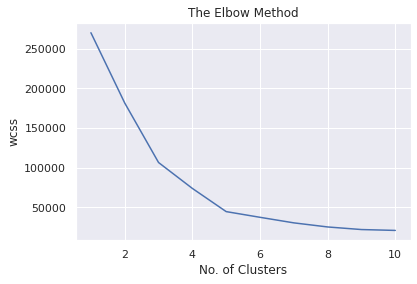

In [43]:
from sklearn.cluster import KMeans
#K-Means Clustering
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

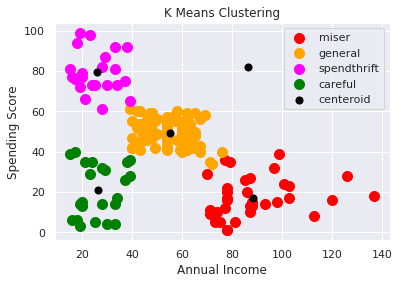

In [44]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'orange', label = 'general')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'green', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [45]:
#Based on Age
x = df.iloc[:, [2, 4]].values
x.shape

(200, 2)

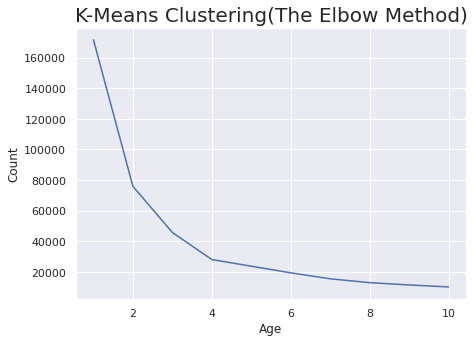

In [46]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

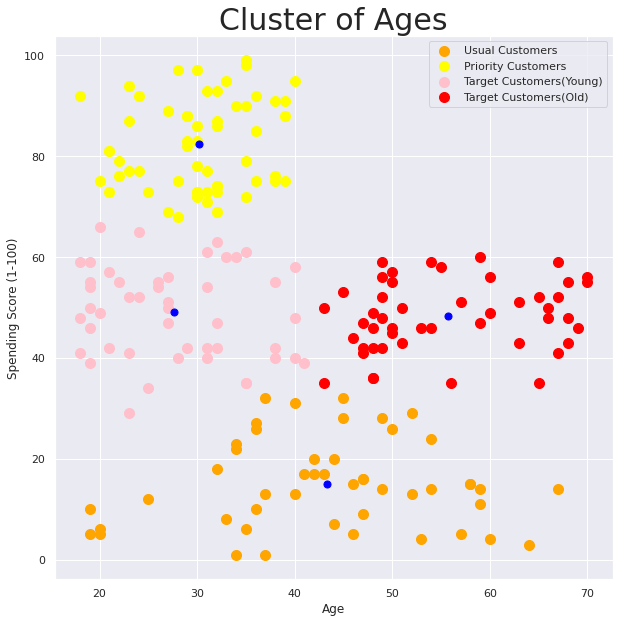

In [47]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)
plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'orange', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'yellow', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'pink', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [48]:
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace = True)
df['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

In [49]:
x = df.iloc[:, [1, 4]].values
x.shape

(200, 2)

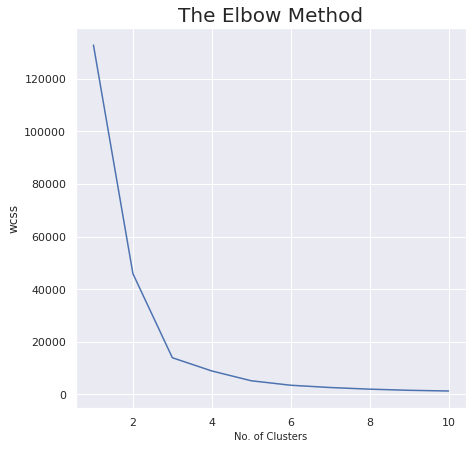

In [50]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  
plt.rcParams['figure.figsize'] = (7, 7)
plt.title('The Elbow Method', fontsize = 20)
plt.plot(range(1, 11), wcss)
plt.xlabel('No. of Clusters', fontsize = 10)
plt.ylabel('wcss')
plt.show()

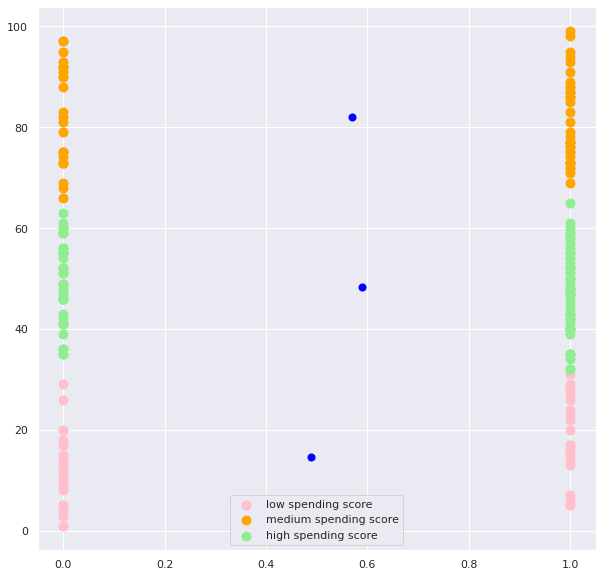

In [51]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 80, c = 'pink', label = 'low spending score')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 80, c = 'orange', label = 'medium spending score')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 80, c = 'lightgreen', label = 'high spending score')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, color = 'blue')
plt.legend()
plt.show()

In [86]:
y = df['Annual Income (k$)']
x = df.drop(columns = ['Annual Income (k$)','Spending Score (1-100)',],axis = 1)
x

,CustomerID,Gender,Age
0,1,0,-1.446834
1,2,0,-1.299798
2,3,1,-1.373316
3,4,1,-1.152762
4,5,1,-0.564618
...,...,...,...
195,196,1,-0.270546
196,197,1,0.464634
197,198,0,-0.491100
198,199,0,-0.491100


In [87]:
y

0      15
1      15
2      15
3      15
4      15
       ..
195    14
196    16
197    16
198    17
199    17
Name: Annual Income (k$), Length: 200, dtype: int64

**12. Split the data into training and testing**

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
x_train.shape

(160, 3)

In [ ]:
x_test.shape

In [89]:
y_train.shape

(160,)

In [90]:
y_test.shape

(40,)

**13. Build the model**

In [92]:
full_health_data = pd.read_csv("Mall_Customers.csv", header=0, sep=",")
x = full_health_data["Annual Income (k$)"]
y = full_health_data["Spending Score (1-100)"]

In [93]:
from scipy.stats import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
    return slope * x + intercept
mymodel = list(map(myfunc, x))

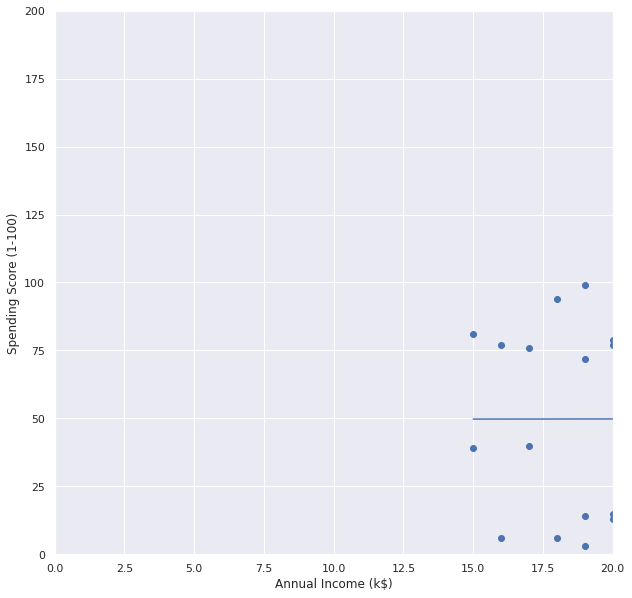

In [94]:
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=0, ymax=200)
plt.xlim(xmin=0, xmax=20)
plt.xlabel("Annual Income (k$)")
plt.ylabel ("Spending Score (1-100)")
plt.show()

**14. Train the model**

In [95]:
import numpy
numpy.random.seed

<function RandomState.seed>

In [96]:
x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x
train_x = x[:60]
train_y = y[:60]
test_x = x[60:]
test_y = y[60:]

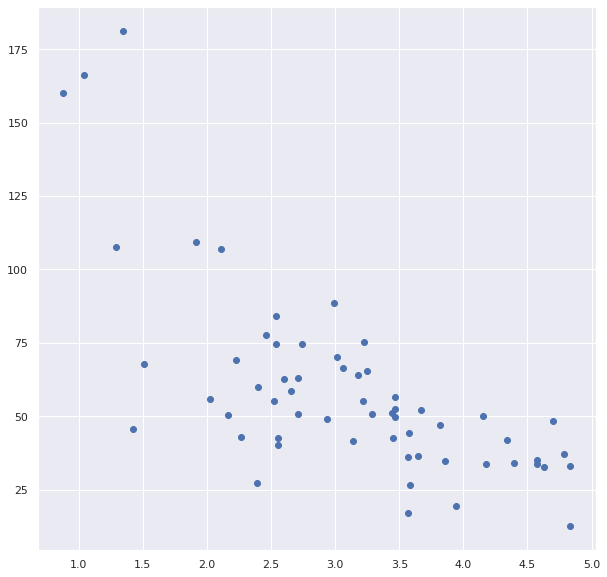

In [97]:
plt.scatter(train_x, train_y)
plt.show()

**15. Test the model**

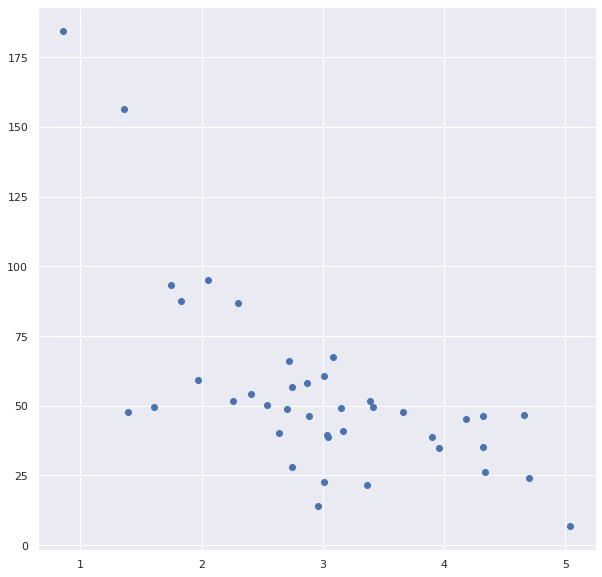

In [98]:
from sklearn.metrics import r2_score
numpy.random.seed
x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x
train_x = x[:60]
train_y = y[:60]
test_x = x[60:]
test_y = y[60:]
plt.scatter(test_x, test_y)
plt.show()

**16. Measure the performance using Evaluation Metrics**

In [99]:
import cProfile
cProfile.run("[(a, b) for a in (1, 3, 5) for b in (2, 4, 6)]")

         4 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<listcomp>)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


